What we'll cover in this chapter
- What topics have been the most shared in the past year?
- What does the research on virality say?
- A look at headlines
- topic modelling and visualization
- cosine similarity

In [3]:
import requests
import pandas as pd
import numpy as np
import json
import time
from selenium import webdriver

pd.set_option('display.max_colwidth', 200)

In [196]:
browser = webdriver.PhantomJS()
browser.set_window_size(1080,800)
browser.get("http://www.ruzzit.com/en-US/Timeline?media=Articles&timeline=Year1&networks=All")
time.sleep(3)

pg_scroll_count = 50

while pg_scroll_count:
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(15)
    pg_scroll_count -= 1

titles = browser.find_elements_by_class_name("article_title")
link_class = browser.find_elements_by_class_name("link_read_more_article")
stats = browser.find_elements_by_class_name("ruzzit_statistics_area")

In [197]:
all_data = []
for title, link, stat in zip(titles, link_class, stats):
    all_data.append((title.text,\
                     link.get_attribute("href"),\
                     stat.find_element_by_class_name("col-md-12").text.split(' shares')[0],
                     stat.find_element_by_class_name("col-md-12").text.split('tweets\n')[1].split('likes\n0')[0],
                     stat.find_element_by_class_name("col-md-12").text.split('1\'s\n')[1].split(' pins')[0],
                     stat.find_element_by_class_name("col-md-12").text.split('pins\n')[1]))

In [198]:
all_data

[("Walker flap exposes GOP rift on Iowa's sacred status - CNN",
  'http://www.ruzzit.com/en-US/Redirect/Link?media=653892',
  '1.2M',
  '1,911 ',
  '8,693',
  '18/3/2015 18:41'),
 ('What Career Should You Actually Have? - BuzzFeed',
  'http://www.ruzzit.com/en-US/Redirect/Link?media=1928328',
  '5.1M',
  '1,559 ',
  '10.9k',
  '24/1/2016 21:00'),
 ('What State Do You Actually Belong In? - BuzzFeed',
  'http://www.ruzzit.com/en-US/Redirect/Link?media=1927663',
  '4.1M',
  '76 ',
  '5,465',
  '24/1/2016 15:15'),
 ('Which "Grease" Pink Lady Are You? - BuzzFeed',
  'http://www.ruzzit.com/en-US/Redirect/Link?media=1960941',
  '3M',
  '0 ',
  '2,760',
  '1/2/2016 03:46'),
 ('https://media.giphy.com/media/xTcnT6Kc5pbyZl8VzO/giphy.gif',
  'http://www.ruzzit.com/en-US/Redirect/Link?media=1931505',
  '2.4M',
  '17 ',
  '302',
  '15/1/2016 15:24'),
 ("Optimistic People All Have One Thing In Common: They're Always Late - Elite",
  'http://www.ruzzit.com/en-US/Redirect/Link?media=1082319',
  '1.6M'

In [201]:
df = pd.DataFrame(all_data, columns=['title', 'link', 'fb', 'lnkdn', 'pins', 'date'])
df

,title,link,fb,lnkdn,pins,date
0,Walker flap exposes GOP rift on Iowa's sacred status - CNN,http://www.ruzzit.com/en-US/Redirect/Link?media=653892,1.2M,"1,911","8,693",18/3/2015 18:41
1,What Career Should You Actually Have? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1928328,5.1M,"1,559",10.9k,24/1/2016 21:00
2,What State Do You Actually Belong In? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1927663,4.1M,76,"5,465",24/1/2016 15:15
3,"Which ""Grease"" Pink Lady Are You? - BuzzFeed",http://www.ruzzit.com/en-US/Redirect/Link?media=1960941,3M,0,"2,760",1/2/2016 03:46
4,https://media.giphy.com/media/xTcnT6Kc5pbyZl8VzO/giphy.gif,http://www.ruzzit.com/en-US/Redirect/Link?media=1931505,2.4M,17,302,15/1/2016 15:24
5,Optimistic People All Have One Thing In Common: They're Always Late - Elite,http://www.ruzzit.com/en-US/Redirect/Link?media=1082319,1.6M,"1,090",313,30/6/2015 20:34
6,"Fast Food Workers: You Don't Deserve $15 an Hour to Flip Burgers, and That'",http://www.ruzzit.com/en-US/Redirect/Link?media=769705,1.4M,595,1,15/4/2015 20:48
7,Zombie-themed 'Walking Dead' cruise setting sail in January - Fox News,http://www.ruzzit.com/en-US/Redirect/Link?media=1074827,1.4M,15,14,26/6/2015 21:31
8,https://media.giphy.com/media/9NAXpI52kjBjG/giphy.gif,http://www.ruzzit.com/en-US/Redirect/Link?media=1689188,1.4M,1,10,8/9/2015 22:01
9,Man Builds 'Dog Train' To Take Rescued Pups Out On Little Adventures - The,http://www.ruzzit.com/en-US/Redirect/Link?media=1432177,1.2M,201,418,22/9/2015 23:02


In [189]:
#browser.save_screenshot('/Users/alexcombs/Desktop/testimg.png')

True

In [211]:
df = df.assign(redirect = df['link'].map(lambda x: requests.get(x).url))

In [212]:
df

,title,link,fb,lnkdn,pins,date,redirect
0,Walker flap exposes GOP rift on Iowa's sacred status - CNN,http://www.ruzzit.com/en-US/Redirect/Link?media=653892,1.2M,"1,911","8,693",18/3/2015 18:41,http://www.cnn.com/
1,What Career Should You Actually Have? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1928328,5.1M,"1,559",10.9k,24/1/2016 21:00,http://www.buzzfeed.com/ashleyperez/what-career-should-you-have
2,What State Do You Actually Belong In? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1927663,4.1M,76,"5,465",24/1/2016 15:15,http://www.buzzfeed.com/awesomer/what-state-do-you-actually-belong-in
3,"Which ""Grease"" Pink Lady Are You? - BuzzFeed",http://www.ruzzit.com/en-US/Redirect/Link?media=1960941,3M,0,"2,760",1/2/2016 03:46,http://www.buzzfeed.com/louispeitzman/which-grease-pink-lady-are-you
4,https://media.giphy.com/media/xTcnT6Kc5pbyZl8VzO/giphy.gif,http://www.ruzzit.com/en-US/Redirect/Link?media=1931505,2.4M,17,302,15/1/2016 15:24,https://media.giphy.com/media/xTcnT6Kc5pbyZl8VzO/giphy.gif
5,Optimistic People All Have One Thing In Common: They're Always Late - Elite,http://www.ruzzit.com/en-US/Redirect/Link?media=1082319,1.6M,"1,090",313,30/6/2015 20:34,http://elitedaily.com/life/culture/optimistic-people-have-one-thing-common-always-late/1097735/
6,"Fast Food Workers: You Don't Deserve $15 an Hour to Flip Burgers, and That'",http://www.ruzzit.com/en-US/Redirect/Link?media=769705,1.4M,595,1,15/4/2015 20:48,http://www.theblaze.com/contributions/fast-food-workers-you-dont-deserve-15-an-hour-to-flip-burgers-and-thats-ok/
7,Zombie-themed 'Walking Dead' cruise setting sail in January - Fox News,http://www.ruzzit.com/en-US/Redirect/Link?media=1074827,1.4M,15,14,26/6/2015 21:31,http://www.foxnews.com/travel/2015/06/26/zombie-themed-walking-dead-cruise-setting-sail-in-january/
8,https://media.giphy.com/media/9NAXpI52kjBjG/giphy.gif,http://www.ruzzit.com/en-US/Redirect/Link?media=1689188,1.4M,1,10,8/9/2015 22:01,https://media.giphy.com/media/9NAXpI52kjBjG/giphy.gif
9,Man Builds 'Dog Train' To Take Rescued Pups Out On Little Adventures - The,http://www.ruzzit.com/en-US/Redirect/Link?media=1432177,1.2M,201,418,22/9/2015 23:02,https://www.thedodo.com/man-builds-dog-train-for-rescued-pups-1362467342.html


In [219]:
def check_home(x):
    if '.com' in x:
        if len(x.split('.com')[1]) < 2:
            return 1
        else:
            return 0
    else:
        return 0

In [222]:
def check_img(x):
    if '.gif' in x or '.jpg' in x:
        return 1
    else:
        return 0

In [220]:
df = df.assign(pg_missing = df['pg_missing'].map(check_home))

In [223]:
df = df.assign(img_link = df['redirect'].map(check_img))

In [382]:
df

,title,link,fb,lnkdn,pins,date,redirect,pg_missing,img_link
0,Walker flap exposes GOP rift on Iowa's sacred status - CNN,http://www.ruzzit.com/en-US/Redirect/Link?media=653892,1.2M,"1,911","8,693",18/3/2015 18:41,http://www.cnn.com/,1,0
1,What Career Should You Actually Have? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1928328,5.1M,"1,559",10.9k,24/1/2016 21:00,http://www.buzzfeed.com/ashleyperez/what-career-should-you-have,0,0
2,What State Do You Actually Belong In? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1927663,4.1M,76,"5,465",24/1/2016 15:15,http://www.buzzfeed.com/awesomer/what-state-do-you-actually-belong-in,0,0
3,"Which ""Grease"" Pink Lady Are You? - BuzzFeed",http://www.ruzzit.com/en-US/Redirect/Link?media=1960941,3M,0,"2,760",1/2/2016 03:46,http://www.buzzfeed.com/louispeitzman/which-grease-pink-lady-are-you,0,0
4,https://media.giphy.com/media/xTcnT6Kc5pbyZl8VzO/giphy.gif,http://www.ruzzit.com/en-US/Redirect/Link?media=1931505,2.4M,17,302,15/1/2016 15:24,https://media.giphy.com/media/xTcnT6Kc5pbyZl8VzO/giphy.gif,0,1
5,Optimistic People All Have One Thing In Common: They're Always Late - Elite,http://www.ruzzit.com/en-US/Redirect/Link?media=1082319,1.6M,"1,090",313,30/6/2015 20:34,http://elitedaily.com/life/culture/optimistic-people-have-one-thing-common-always-late/1097735/,0,0
6,"Fast Food Workers: You Don't Deserve $15 an Hour to Flip Burgers, and That'",http://www.ruzzit.com/en-US/Redirect/Link?media=769705,1.4M,595,1,15/4/2015 20:48,http://www.theblaze.com/contributions/fast-food-workers-you-dont-deserve-15-an-hour-to-flip-burgers-and-thats-ok/,0,0
7,Zombie-themed 'Walking Dead' cruise setting sail in January - Fox News,http://www.ruzzit.com/en-US/Redirect/Link?media=1074827,1.4M,15,14,26/6/2015 21:31,http://www.foxnews.com/travel/2015/06/26/zombie-themed-walking-dead-cruise-setting-sail-in-january/,0,0
8,https://media.giphy.com/media/9NAXpI52kjBjG/giphy.gif,http://www.ruzzit.com/en-US/Redirect/Link?media=1689188,1.4M,1,10,8/9/2015 22:01,https://media.giphy.com/media/9NAXpI52kjBjG/giphy.gif,0,1
9,Man Builds 'Dog Train' To Take Rescued Pups Out On Little Adventures - The,http://www.ruzzit.com/en-US/Redirect/Link?media=1432177,1.2M,201,418,22/9/2015 23:02,https://www.thedodo.com/man-builds-dog-train-for-rescued-pups-1362467342.html,0,0


In [383]:
df[df['pg_missing']==1]

,title,link,fb,lnkdn,pins,date,redirect,pg_missing,img_link
0,Walker flap exposes GOP rift on Iowa's sacred status - CNN,http://www.ruzzit.com/en-US/Redirect/Link?media=653892,1.2M,"1,911","8,693",18/3/2015 18:41,http://www.cnn.com/,1,0
26,London Fashion Week: Sibling Fall/Winter 2015 - The New York Times,http://www.ruzzit.com/en-US/Redirect/Link?media=558599,807k,"8,290",29.7k,21/2/2015 17:02,http://www.nytimes.com/,1,0
86,Israel and Palestine: Forgiving for Peace? - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1390577,375k,"3,660",46k,16/9/2015 23:47,http://www.huffingtonpost.com/,1,0
118,Fighting Income Inequality Is at Hillary's Roots - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1949234,374k,3,0,29/1/2016 03:34,http://www.huffingtonpost.com/,1,0
125,HACKED BY ISLAMIC STATE HACKING DIVISION - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=745234,368k,0,0,13/4/2015 19:27,http://www.huffingtonpost.com/,1,0
150,3 Things That Can Hurt Your Business's Valuation - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1272113,330k,0,0,19/8/2015 18:47,http://www.huffingtonpost.com/,1,0
153,VIP Nightlife in DC Just Got Easier - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1211957,328k,0,0,5/8/2015 02:55,http://www.huffingtonpost.com/,1,0
154,3 Steps to Summer Ready Skin - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1108704,322k,"3,245",0,10/7/2015 18:54,http://www.huffingtonpost.com/,1,0
157,Why Do We Grab Life By The Balls? - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1091700,322k,"3,245",0,7/7/2015 02:30,http://www.huffingtonpost.com,1,0
162,5 Things Only People Sexually Attracted To Animals Know (NSFW) - The Huffin,http://www.ruzzit.com/en-US/Redirect/Link?media=1094859,322k,0,0,7/7/2015 20:20,http://www.huffingtonpost.com,1,0


In [384]:
len(df[df['pg_missing']==1])

17

In [385]:
len(df[df['img_link']==1])

9

In [386]:
df[df['pg_missing']==1]

,title,link,fb,lnkdn,pins,date,redirect,pg_missing,img_link
0,Walker flap exposes GOP rift on Iowa's sacred status - CNN,http://www.ruzzit.com/en-US/Redirect/Link?media=653892,1.2M,"1,911","8,693",18/3/2015 18:41,http://www.cnn.com/,1,0
26,London Fashion Week: Sibling Fall/Winter 2015 - The New York Times,http://www.ruzzit.com/en-US/Redirect/Link?media=558599,807k,"8,290",29.7k,21/2/2015 17:02,http://www.nytimes.com/,1,0
86,Israel and Palestine: Forgiving for Peace? - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1390577,375k,"3,660",46k,16/9/2015 23:47,http://www.huffingtonpost.com/,1,0
118,Fighting Income Inequality Is at Hillary's Roots - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1949234,374k,3,0,29/1/2016 03:34,http://www.huffingtonpost.com/,1,0
125,HACKED BY ISLAMIC STATE HACKING DIVISION - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=745234,368k,0,0,13/4/2015 19:27,http://www.huffingtonpost.com/,1,0
150,3 Things That Can Hurt Your Business's Valuation - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1272113,330k,0,0,19/8/2015 18:47,http://www.huffingtonpost.com/,1,0
153,VIP Nightlife in DC Just Got Easier - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1211957,328k,0,0,5/8/2015 02:55,http://www.huffingtonpost.com/,1,0
154,3 Steps to Summer Ready Skin - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1108704,322k,"3,245",0,10/7/2015 18:54,http://www.huffingtonpost.com/,1,0
157,Why Do We Grab Life By The Balls? - The Huffington Post,http://www.ruzzit.com/en-US/Redirect/Link?media=1091700,322k,"3,245",0,7/7/2015 02:30,http://www.huffingtonpost.com,1,0
162,5 Things Only People Sexually Attracted To Animals Know (NSFW) - The Huffin,http://www.ruzzit.com/en-US/Redirect/Link?media=1094859,322k,0,0,7/7/2015 20:20,http://www.huffingtonpost.com,1,0


In [387]:
dfc = df[(df['img_link']!=1)&(df['pg_missing']!=1)]

In [388]:
dfc

,title,link,fb,lnkdn,pins,date,redirect,pg_missing,img_link
1,What Career Should You Actually Have? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1928328,5.1M,"1,559",10.9k,24/1/2016 21:00,http://www.buzzfeed.com/ashleyperez/what-career-should-you-have,0,0
2,What State Do You Actually Belong In? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1927663,4.1M,76,"5,465",24/1/2016 15:15,http://www.buzzfeed.com/awesomer/what-state-do-you-actually-belong-in,0,0
3,"Which ""Grease"" Pink Lady Are You? - BuzzFeed",http://www.ruzzit.com/en-US/Redirect/Link?media=1960941,3M,0,"2,760",1/2/2016 03:46,http://www.buzzfeed.com/louispeitzman/which-grease-pink-lady-are-you,0,0
5,Optimistic People All Have One Thing In Common: They're Always Late - Elite,http://www.ruzzit.com/en-US/Redirect/Link?media=1082319,1.6M,"1,090",313,30/6/2015 20:34,http://elitedaily.com/life/culture/optimistic-people-have-one-thing-common-always-late/1097735/,0,0
6,"Fast Food Workers: You Don't Deserve $15 an Hour to Flip Burgers, and That'",http://www.ruzzit.com/en-US/Redirect/Link?media=769705,1.4M,595,1,15/4/2015 20:48,http://www.theblaze.com/contributions/fast-food-workers-you-dont-deserve-15-an-hour-to-flip-burgers-and-thats-ok/,0,0
7,Zombie-themed 'Walking Dead' cruise setting sail in January - Fox News,http://www.ruzzit.com/en-US/Redirect/Link?media=1074827,1.4M,15,14,26/6/2015 21:31,http://www.foxnews.com/travel/2015/06/26/zombie-themed-walking-dead-cruise-setting-sail-in-january/,0,0
9,Man Builds 'Dog Train' To Take Rescued Pups Out On Little Adventures - The,http://www.ruzzit.com/en-US/Redirect/Link?media=1432177,1.2M,201,418,22/9/2015 23:02,https://www.thedodo.com/man-builds-dog-train-for-rescued-pups-1362467342.html,0,0
13,15 hilarious parenting comics that are almost too real.,http://www.ruzzit.com/en-US/Redirect/Link?media=1524072,1.1M,115,266,18/10/2015 21:58,http://www.upworthy.com/15-hilarious-parenting-comics-that-are-almost-too-real,0,0
14,33 Insanely Clever Things Your Small Apartment Needs - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1821965,60.8k,69,954k,30/12/2015 16:13,http://www.buzzfeed.com/peggy/33-insanely-clever-things-your-small-apartment-needs,0,0
15,Donald Trump has flip-flopped so much that Stephen Colbert hosted a Trump v,http://www.ruzzit.com/en-US/Redirect/Link?media=1981872,1M,295,16,29/1/2016 16:04,http://www.vox.com/2016/1/29/10868392/stephen-colbert-debate-donald-trump,0,0


In [389]:
def get_data(x):
    try:
        data = requests.get('https://api.embedly.com/1/extract?key=SECRET_KEY&url=' + x)
        json_data = json.loads(data.text)
        return json_data
    except:
        print('Failed')
        return None

In [390]:
dfc = dfc.assign(json_data = dfc['redirect'].map(get_data))

In [392]:
dfc_bak = dfc

In [393]:
dfc

,title,link,fb,lnkdn,pins,date,redirect,pg_missing,img_link,json_data
1,What Career Should You Actually Have? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1928328,5.1M,"1,559",10.9k,24/1/2016 21:00,http://www.buzzfeed.com/ashleyperez/what-career-should-you-have,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original_url': 'http://www.buzzfeed.com/as..."
2,What State Do You Actually Belong In? - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1927663,4.1M,76,"5,465",24/1/2016 15:15,http://www.buzzfeed.com/awesomer/what-state-do-you-actually-belong-in,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original_url': 'http://www.buzzfeed.com/aw..."
3,"Which ""Grease"" Pink Lady Are You? - BuzzFeed",http://www.ruzzit.com/en-US/Redirect/Link?media=1960941,3M,0,"2,760",1/2/2016 03:46,http://www.buzzfeed.com/louispeitzman/which-grease-pink-lady-are-you,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original_url': 'http://www.buzzfeed.com/lo..."
5,Optimistic People All Have One Thing In Common: They're Always Late - Elite,http://www.ruzzit.com/en-US/Redirect/Link?media=1082319,1.6M,"1,090",313,30/6/2015 20:34,http://elitedaily.com/life/culture/optimistic-people-have-one-thing-common-always-late/1097735/,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.00024414060000000002, 'color': [0, 0, 0]}], 'original_url': 'http://elitedaily.com/life/culture/optimistic-people-have-one-thing-comm..."
6,"Fast Food Workers: You Don't Deserve $15 an Hour to Flip Burgers, and That'",http://www.ruzzit.com/en-US/Redirect/Link?media=769705,1.4M,595,1,15/4/2015 20:48,http://www.theblaze.com/contributions/fast-food-workers-you-dont-deserve-15-an-hour-to-flip-burgers-and-thats-ok/,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.1606445312, 'color': [0, 0, 0]}, {'weight': 0.0893554688, 'color': [207, 33, 19]}], 'original_url': 'http://www.theblaze.com/contribu..."
7,Zombie-themed 'Walking Dead' cruise setting sail in January - Fox News,http://www.ruzzit.com/en-US/Redirect/Link?media=1074827,1.4M,15,14,26/6/2015 21:31,http://www.foxnews.com/travel/2015/06/26/zombie-themed-walking-dead-cruise-setting-sail-in-january/,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.1630859375, 'color': [12, 59, 85]}, {'weight': 0.050048828100000005, 'color': [155, 25, 18]}, {'weight': 0.02734375, 'color': [242, 2..."
9,Man Builds 'Dog Train' To Take Rescued Pups Out On Little Adventures - The,http://www.ruzzit.com/en-US/Redirect/Link?media=1432177,1.2M,201,418,22/9/2015 23:02,https://www.thedodo.com/man-builds-dog-train-for-rescued-pups-1362467342.html,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.1784667969, 'color': [11, 11, 11]}, {'weight': 0.0544433594, 'color': [245, 245, 245]}, {'weight': 0.0170898438, 'color': [152, 152, ..."
13,15 hilarious parenting comics that are almost too real.,http://www.ruzzit.com/en-US/Redirect/Link?media=1524072,1.1M,115,266,18/10/2015 21:58,http://www.upworthy.com/15-hilarious-parenting-comics-that-are-almost-too-real,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.0383300781, 'color': [249, 249, 249]}, {'weight': 0.024169921900000002, 'color': [247, 96, 18]}], 'original_url': 'http://www.upworth..."
14,33 Insanely Clever Things Your Small Apartment Needs - BuzzFeed,http://www.ruzzit.com/en-US/Redirect/Link?media=1821965,60.8k,69,954k,30/12/2015 16:13,http://www.buzzfeed.com/peggy/33-insanely-clever-things-your-small-apartment-needs,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original

In [394]:
def get_title(x):
    try:
        return x.get('title')
    except:
        return None

In [395]:
dfc = dfc.assign(title = dfc['json_data'].map(get_title))

In [396]:
def get_site(x):
    try:
        return x.get('provider_name')
    except:
        return None

In [397]:
dfc = dfc.assign(site = dfc['json_data'].map(get_site))

In [398]:
def get_images(x):
    try:
        return len(x.get('images'))
    except:
        return None

In [399]:
dfc = dfc.assign(img_count = dfc['json_data'].map(get_images))

In [400]:
def get_entities(x):
    try:
        return [y.get('name') for y in x.get('entities')]
    except:
        return None

In [401]:
dfc = dfc.assign(entities = dfc['json_data'].map(get_entities))

In [402]:
def get_html(x):
    try:
        return x.get('content')
    except:
        return None

In [403]:
dfc = dfc.assign(html = dfc['json_data'].map(get_html))

In [786]:
dfc[::-1]

,title,link,fb,lnkdn,pins,date,redirect,pg_missing,img_link,json_data,site,img_count,html,text,main_rgb,main_hex,reds,greens,blues
509,'Stay-at-Home Mom' Is Not a Real Job,http://www.ruzzit.com/en-US/Redirect/Link?media=1286067,179000,375,10,2015-08-18 22:55:00,http://www.huffingtonpost.com/jennifer-sullivan/stay-at-home-mom-is-not-a-real-job_b_8003750.html,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.055908203100000005, 'color': [26, 112, 99]}, {'weight': 0.0065917969, 'color': [248, 251, 250]}], 'original_url': 'http://www.huffing...",The Huffington Post,1,"<div>\n<p>I've heard the assertion made time and time again: Being a stay-at-home mom is not akin to having a ""real"" job. And as a stay-at-home mom, I'm here to tell you... They're right. I'm not ...","\nI've heard the assertion made time and time again: Being a stay-at-home mom is not akin to having a ""real"" job. And as a stay-at-home mom, I'm here to tell you... They're right. I'm not sure why...","[243, 245, 245]",#f3f5f5,243,245,245
508,The Most Mysterious Star in Our Galaxy,http://www.ruzzit.com/en-US/Redirect/Link?media=1515874,169000,517,135,2015-10-13 15:18:00,http://www.theatlantic.com/science/archive/2015/10/the-most-interesting-star-in-our-galaxy/410023/,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.044921875, 'color': [10, 20, 18]}, {'weight': 0.017578125, 'color': [199, 199, 199]}], 'original_url': 'http://www.theatlantic.com/sc...",The Atlantic,5,<div>\n<p>Astronomers have spotted a strange mess of objects whirling around a distant star. Scientists who search for extraterrestrial civilizations are scrambling to get a closer look. </p>\n<p>...,\nAstronomers have spotted a strange mess of objects whirling around a distant star. Scientists who search for extraterrestrial civilizations are scrambling to get a closer look. \n\n\n\nKevin Mor...,"[19, 19, 19]",#131313,19,19,19
507,Why Our Children Don't Think There Are Moral Facts,http://www.ruzzit.com/en-US/Redirect/Link?media=606885,176000,417,120,2015-03-02 19:21:00,http://opinionator.blogs.nytimes.com/2015/03/02/why-our-children-dont-think-there-are-moral-facts/?_r=0,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': None, 'original_url': 'http://opinionator.blogs.nytimes.com/2015/03/02/why-our-children-dont-think-there-are-moral-facts/?_r=0', 'content': '<div> ...",Opinionator,3,"<div>\n<img src=""http://graphics8.nytimes.com/images/blogs_v3/opinionator/pogs/thestone45.gif""><figure><img src=""http://graphics8.nytimes.com/images/2015/03/02/opinion/02Stone-web/02Stone-web-blog...",\nWhat would you say if you found out that our public schools were teaching children that it is not true that it's wrong to kill people for fun or cheat on tests? Would you be surprised?\nI was. A...,"[248, 251, 250]",#f8fbfa,248,251,250
506,"The Psychology Of Nail-Biting, Skin-Picking And Other Compulsive Behaviors",http://www.ruzzit.com/en-US/Redirect/Link?media=634623,178000,380,25,2015-03-13 15:42:00,http://www.huffingtonpost.com/2015/03/13/nail-biting-nervous-habits_n_6854152.html,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.055908203100000005, 'color': [26, 112, 99]}, {'weight': 0.0065917969, 'color': [248, 251, 250]}], 'original_url': 'http://www.huffing...",The Huffington Post,2,<div>\n<p>Are you mindlessly twisting your hair or biting your nails as you read this article? New research from the University of Montreal suggests that compulsive behaviors like these might say ...,\nAre you mindlessly twisting your hair or biting your nails as you read this article? New research from the University of Montreal suggests that compulsive behaviors like these might say more abo...,"[109, 71, 60]",#6d473c,109,71,60
505,"Yogi Berra, Yankee Who Built His Stardom 90 Percent on Skill and Half on Wit, Dies at 90",http://www.ruzzit.com/en-US/Redirect/Link?media=1416921,172000,505,10,2015-09-23 08:58:00,http://www.nytimes.com/2015/09/24/sports/baseball/yogi-berra-dies-at

In [405]:
from bs4 import BeautifulSoup

In [406]:
def text_from_html(x):
    try:
        soup = BeautifulSoup(x, 'lxml')
        return soup.get_text()
    except:
        return None

In [407]:
dfc = dfc.assign(text = dfc['html'].map(text_from_html))

In [787]:
dfc[::-1]

,title,link,fb,lnkdn,pins,date,redirect,pg_missing,img_link,json_data,site,img_count,html,text,main_rgb,main_hex,reds,greens,blues
509,'Stay-at-Home Mom' Is Not a Real Job,http://www.ruzzit.com/en-US/Redirect/Link?media=1286067,179000,375,10,2015-08-18 22:55:00,http://www.huffingtonpost.com/jennifer-sullivan/stay-at-home-mom-is-not-a-real-job_b_8003750.html,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.055908203100000005, 'color': [26, 112, 99]}, {'weight': 0.0065917969, 'color': [248, 251, 250]}], 'original_url': 'http://www.huffing...",The Huffington Post,1,"<div>\n<p>I've heard the assertion made time and time again: Being a stay-at-home mom is not akin to having a ""real"" job. And as a stay-at-home mom, I'm here to tell you... They're right. I'm not ...","\nI've heard the assertion made time and time again: Being a stay-at-home mom is not akin to having a ""real"" job. And as a stay-at-home mom, I'm here to tell you... They're right. I'm not sure why...","[243, 245, 245]",#f3f5f5,243,245,245
508,The Most Mysterious Star in Our Galaxy,http://www.ruzzit.com/en-US/Redirect/Link?media=1515874,169000,517,135,2015-10-13 15:18:00,http://www.theatlantic.com/science/archive/2015/10/the-most-interesting-star-in-our-galaxy/410023/,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.044921875, 'color': [10, 20, 18]}, {'weight': 0.017578125, 'color': [199, 199, 199]}], 'original_url': 'http://www.theatlantic.com/sc...",The Atlantic,5,<div>\n<p>Astronomers have spotted a strange mess of objects whirling around a distant star. Scientists who search for extraterrestrial civilizations are scrambling to get a closer look. </p>\n<p>...,\nAstronomers have spotted a strange mess of objects whirling around a distant star. Scientists who search for extraterrestrial civilizations are scrambling to get a closer look. \n\n\n\nKevin Mor...,"[19, 19, 19]",#131313,19,19,19
507,Why Our Children Don't Think There Are Moral Facts,http://www.ruzzit.com/en-US/Redirect/Link?media=606885,176000,417,120,2015-03-02 19:21:00,http://opinionator.blogs.nytimes.com/2015/03/02/why-our-children-dont-think-there-are-moral-facts/?_r=0,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': None, 'original_url': 'http://opinionator.blogs.nytimes.com/2015/03/02/why-our-children-dont-think-there-are-moral-facts/?_r=0', 'content': '<div> ...",Opinionator,3,"<div>\n<img src=""http://graphics8.nytimes.com/images/blogs_v3/opinionator/pogs/thestone45.gif""><figure><img src=""http://graphics8.nytimes.com/images/2015/03/02/opinion/02Stone-web/02Stone-web-blog...",\nWhat would you say if you found out that our public schools were teaching children that it is not true that it's wrong to kill people for fun or cheat on tests? Would you be surprised?\nI was. A...,"[248, 251, 250]",#f8fbfa,248,251,250
506,"The Psychology Of Nail-Biting, Skin-Picking And Other Compulsive Behaviors",http://www.ruzzit.com/en-US/Redirect/Link?media=634623,178000,380,25,2015-03-13 15:42:00,http://www.huffingtonpost.com/2015/03/13/nail-biting-nervous-habits_n_6854152.html,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.055908203100000005, 'color': [26, 112, 99]}, {'weight': 0.0065917969, 'color': [248, 251, 250]}], 'original_url': 'http://www.huffing...",The Huffington Post,2,<div>\n<p>Are you mindlessly twisting your hair or biting your nails as you read this article? New research from the University of Montreal suggests that compulsive behaviors like these might say ...,\nAre you mindlessly twisting your hair or biting your nails as you read this article? New research from the University of Montreal suggests that compulsive behaviors like these might say more abo...,"[109, 71, 60]",#6d473c,109,71,60
505,"Yogi Berra, Yankee Who Built His Stardom 90 Percent on Skill and Half on Wit, Dies at 90",http://www.ruzzit.com/en-US/Redirect/Link?media=1416921,172000,505,10,2015-09-23 08:58:00,http://www.nytimes.com/2015/09/24/sports/baseball/yogi-berra-dies-at

## Clean up data for counts and date

In [409]:
def clean_counts(x):
    if 'M' in str(x):
        d = x.split('M')[0]
        dm = float(d) * 1000000
        return dm
    elif 'k' in str(x):
        d = x.split('k')[0]
        dk = float(d.replace(',','')) * 1000
        return dk
    elif ',' in str(x):
        d = x.replace(',','')
        return int(d)
    else:
        return x

In [410]:
dfc = dfc.assign(fb = dfc['fb'].map(clean_counts))

In [411]:
dfc = dfc.assign(lnkdn = dfc['lnkdn'].map(clean_counts))

In [412]:
dfc = dfc.assign(pins = dfc['pins'].map(clean_counts))

In [413]:
dfc = dfc.assign(date = pd.to_datetime(dfc['date'], dayfirst=True))

In [414]:
dfc

,title,link,fb,lnkdn,pins,date,redirect,pg_missing,img_link,json_data,site,img_count,entities,html,text
1,What Career Should You Actually Have?,http://www.ruzzit.com/en-US/Redirect/Link?media=1928328,5100000,1559,10900,2016-01-24 21:00:00,http://www.buzzfeed.com/ashleyperez/what-career-should-you-have,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original_url': 'http://www.buzzfeed.com/as...",BuzzFeed,5,[],None,None
2,What State Do You Actually Belong In?,http://www.ruzzit.com/en-US/Redirect/Link?media=1927663,4100000,76,5465,2016-01-24 15:15:00,http://www.buzzfeed.com/awesomer/what-state-do-you-actually-belong-in,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original_url': 'http://www.buzzfeed.com/aw...",BuzzFeed,5,"[Blues Brothers Which Famous, Fast Times, Supreme Court, British, Jesus, Sweden, Viola Beach, Hitler, Bull Durham, Pentagon, Antonin Scalia, Titans]",None,None
3,"Which ""Grease"" Pink Lady Are You?",http://www.ruzzit.com/en-US/Redirect/Link?media=1960941,3000000,0,2760,2016-02-01 03:46:00,http://www.buzzfeed.com/louispeitzman/which-grease-pink-lady-are-you,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original_url': 'http://www.buzzfeed.com/lo...",BuzzFeed,5,"[Sweden, Antonin Scalia, Supreme Court, British, Viola Beach]",None,None
5,Optimistic People All Have One Thing In Common: They're Always Late,http://www.ruzzit.com/en-US/Redirect/Link?media=1082319,1600000,1090,313,2015-06-30 20:34:00,http://elitedaily.com/life/culture/optimistic-people-have-one-thing-common-always-late/1097735/,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.00024414060000000002, 'color': [0, 0, 0]}], 'original_url': 'http://elitedaily.com/life/culture/optimistic-people-have-one-thing-comm...",Elite Daily,1,"[Europe, Diana, San Diego State University, United States, Germany, Vladimir Putin, Angela Merkel, Spain, Latin America]","<div>\n<p>I woke up at 6 am this morning, three hours before I'm supposed to be in the office, and was still 10 minutes late to work.</p>\n<p>This is pretty standard for me. I'm almost always a fe...","\nI woke up at 6 am this morning, three hours before I'm supposed to be in the office, and was still 10 minutes late to work.\nThis is pretty standard for me. I'm almost always a few minutes late...."
6,"Fast Food Workers: You Don't Deserve $15 an Hour to Flip Burgers, and That's OK",http://www.ruzzit.com/en-US/Redirect/Link?media=769705,1400000,595,1,2015-04-15 20:48:00,http://www.theblaze.com/contributions/fast-food-workers-you-dont-deserve-15-an-hour-to-flip-burgers-and-thats-ok/,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.1606445312, 'color': [0, 0, 0]}, {'weight': 0.0893554688, 'color': [207, 33, 19]}], 'original_url': 'http://www.theblaze.com/contribu...",The Blaze,5,"[Big Mac, God, NGO, Congressional Budget Office, Wendy, Kelsey Peck, Michael Pfeiffer, Hopps, Amy Curtis, Matt Walsh, Samuel, Andrew Moser, Matt Ellis, America, Delaware, Taco Bell, McDonald 's, K...","<div>\n<p>Contribution</p>\n<p><a href=""http://www.theblaze.com/author/matt-walsh/""> <img src=""http://www.theblaze.com/wp-content/uploads/userphoto/13962728.1285175.jpg""></a></p>\n<p>Dear fast foo...","\nContribution\n \nDear fast food workers,\nIt's come to my attention that many of you, supposedly in 230 cities across the country, are walking out of your jobs today and protesting for $15 an ho..."
7,Zombie-themed 'Walking Dead' cruise setting sail in January,http://www.ruzzit.com/en-US/Redirect/Link?media=1074827,1400000,15,14,2015-06-26 21:31:00,http://www.foxnews.com/travel/2015/06/26/zombie-themed-walking-dead-cruise-setting-sail-in-january/,0,0,"{'type': 'html', '

In [17]:
def get_word_count(x):
    if not x is None:
        return len(x.split(' '))
    else:
        return None

In [18]:
dfc = dfc.assign(word_count = dfc['text'].map(get_word_count))

In [19]:
dfc[['text','word_count']][::-1]

,text,word_count
99,None,NaN
98,"\nAre you smarter than a Common Core 4th grader?\nTom Hinchey March 6, 2015 at 12:14pm\nAdvertisement - story continues below\nKaren Lamoreaux addressed the Arkansas Board of Education in December...",528
97,"\n\n\n \n\n\n \n\n\n\n\n1. The theme song says the word Caillou 14,356 times. And it's sung by him, in his voice, which will drive you nuts after five minutes. The director basically told the voic...",291
96,"\n4. There was a smoking section in the dining hall. \n16. And you could call anyone on campus just by dialing their ""extension."" \n17. When you got your roommate assignment, you had NO IDEA what ...",54
95,None,NaN
94,"\nWe now know why the United States Congress absolutely did not want Pope Francis to come to America. He makes them look like the complete as*holes they are. Obviously, Congress thought Pope Franc...",390
93,"\nGiven the historic low temperatures and snowfalls that pummeled the eastern U.S. this winter, it might be easy to overlook how devastating California's winter was as well.\nAs our ""wet"" season d...",786
92,"\n\nNicholas Winton, a Briton who said nothing for a half-century about his role in organizing the escape of 669 mostly Jewish children from Czechoslovakia on the eve of World War II, a righteous ...",1829
91,None,NaN
90,"\nHistorians may look to 2015 as the year when shit really started hitting the fan. Some snapshots: In just the past few months, record-setting heat waves in Pakistan and India each killed more th...",3297


## Get Main Image Colors

In [10]:
import matplotlib.colors as mpc

In [11]:
def get_hex(x):
    try:
        if x.get('images'):
            main_color = x.get('images')[0].get('colors')[0].get('color')
            return mpc.rgb2hex([(x/255) for x in main_color])
    except:
        return None

In [12]:
def get_rgb(x):
    try:
        if x.get('images'):
            main_color = x.get('images')[0].get('colors')[0].get('color')
            return main_color
    except:
        return None

In [13]:
dfc = dfc.assign(main_hex = dfc['json_data'].map(get_hex))
dfc = dfc.assign(main_rgb = dfc['json_data'].map(get_rgb))

In [16]:
dfc

,date,fb,html,img_count,img_link,json_data,link,lnkdn,main_hex,main_rgb,pg_missing,pins,redirect,site,text,title
1,2016-01-24 21:00:00,5100000,None,5,0,"{'offset': None, 'original_url': 'http://www.buzzfeed.com/ashleyperez/what-career-should-you-have', 'cache_age': 77991, 'published': None, 'related': [], 'language': 'Catalan', 'lead': None, 'enti...",http://www.ruzzit.com/en-US/Redirect/Link?media=1928328,1559,#b29e83,"[178, 158, 131]",0,10900,http://www.buzzfeed.com/ashleyperez/what-career-should-you-have,BuzzFeed,None,What Career Should You Actually Have?
100,2015-02-23 15:39:00,400000,"<div>\n<p>\n</p><p><a href=""http://www.buzzfeed.com/trending""> <img src=""https://img.buzzfeed.com/buzzfeed-static/static/badge_images/viral.png?v=1455385914""></a></p>\n<div>\n<div>\n<div>\n<div>1....",5,0,"{'offset': None, 'original_url': 'http://www.buzzfeed.com/ryanhatesthis/no-one-showed-up-to-a-little-boy-with-autisms-birthday-so-hi', 'cache_age': 78367, 'published': None, 'related': [], 'langua...",http://www.ruzzit.com/en-US/Redirect/Link?media=564259,277,#0c1514,"[12, 21, 20]",0,4,http://www.buzzfeed.com/ryanhatesthis/no-one-showed-up-to-a-little-boy-with-autisms-birthday-so-hi,BuzzFeed,"\n\n \n\n\n\n1. This is Glenn Buratti, a 6-year-old from Osceola County, Florida. He has mild autism and epilepsy. Earlier this month, his mom Ashlee threw him a birthday party, inviting 16 childr...","No One Showed Up To A Little Boy With Autism's Birthday, So His Mom Asked Facebook For Help"
101,2015-07-11 00:36:00,402000,"<div>\n<p>\n</p><div>\n<div>\n<div>\n<div>1. Everyone loves ice cream. </div>\n<div>2. And of course churros are just as incredible. </div>\n<div>\n<h2>3. Individually, they make for a pretty tast...",5,0,"{'offset': None, 'original_url': 'http://www.buzzfeed.com/pablovaldivia/churro-ice-cream-sandwich', 'cache_age': 78370, 'published': None, 'related': [], 'language': 'English', 'lead': None, 'enti...",http://www.ruzzit.com/en-US/Redirect/Link?media=1109973,15,#c69e73,"[198, 158, 115]",0,59,http://www.buzzfeed.com/pablovaldivia/churro-ice-cream-sandwich,BuzzFeed,"\n\n\n\n\n1. Everyone loves ice cream. \n2. And of course churros are just as incredible. \n\n3. Individually, they make for a pretty tasty dessert...\n\n\n\n\n\n4. ...but have you ever thought ab...",Churro Ice Cream Sandwiches Are The Most Delicious Thing You Need In Your Life
102,2015-06-26 22:08:00,401000,"<div>\n<h3>In 2013, Zerlina Maxwell ignited a firestorm of controversy when she strongly recommended we stop telling women how to not get raped. </h3>\n<p>Here are her words, from the <a href=""htt...",2,0,"{'offset': None, 'original_url': 'http://www.upworthy.com/how-7-things-that-have-nothing-to-do-with-rape-perfectly-illustrate-the-concept-of-consent', 'cache_age': 78371, 'published': None, 'relat...",http://www.ruzzit.com/en-US/Redirect/Link?media=1065792,58,#e9eff4,"[233, 239, 244]",0,334,http://www.upworthy.com/how-7-things-that-have-nothing-to-do-with-rape-perfectly-illustrate-the-concept-of-consent,Upworthy,"\nIn 2013, Zerlina Maxwell ignited a firestorm of controversy when she strongly recommended we stop telling women how to not get raped. \nHere are her words, from the transcript of her appearance ...",How 7 things that have nothing to do with rape perfectly illustrate the concept of consent
103,2015-07-15 07:15:00,402000,None,5,0,"{'offset': None, 'original_url': 'http://www.buzzfeed.com/leonoraepstein/childhood-disney-products-that-are-now-worth-bank', 'cache_age': 78374, 'published': None, 'related': [], 'language': 'Engl...",http://www.ruzzit.com/en-US/Redirect/Link?media=1125885,5,#f3f4f0,"[243, 244, 240]",0,37,http://www.buzzfeed.com/leonoraepstein/childhood-disney-products-that-are-now-worth-bank,BuzzFeed,None,26 Of Your Childhood Disney Products That Are Now Worth Bank
104,2015-09-30 22:56:00,398000,None,5,0,"{'offset': None, 'original_url': 'http://www.buzzfeed.com/kirstenking/have-you-tried-herbal-tea', 'cache_age': 78378, 'published': None

In [811]:
dfc['img_count'].value_counts().to_frame('count')

,count
5,342
4,37
2,36
1,36
3,30
0,1


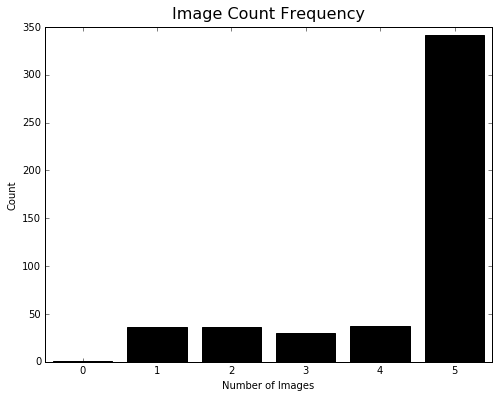

In [863]:
fig, ax = plt.subplots(figsize=(8,6))
y = dfc['img_count'].value_counts().sort_index()
x = y.sort_index().index
plt.bar(x, y, color='k', align='center')
plt.title('Image Count Frequency', fontsize=16, y=1.01)
ax.set_xlim(-.5,5.5)
ax.set_ylabel('Count')
ax.set_xlabel('Number of Images')

In [4]:
#dfc.to_json('/Users/alexcombs/Desktop/viral_data.json')
dfc = pd.read_json('/Users/alexcombs/Desktop/viral_data.json')

In [5]:
mci = dfc['main_hex'].value_counts().to_frame('count')
mci

,count
#f8fbfa,3
#c4c4c4,3
#211537,2
#3dd876,2
#39546c,2
#070603,2
#f1f3f1,2
#f6fafb,2
#c6b7b5,2
#f4f8f9,2


In [6]:
mci['color'] = ' '

In [7]:
def color_cells(x):
    return 'background-color: ' + x.index

In [8]:
mci.style.apply(color_cells, subset=['color'], axis=0)

In [695]:
def get_csplit(x):
    try:
        return x[0], x[1], x[2]
    except:
        return None, None, None

In [696]:
dfc['reds'], dfc['greens'], dfc['blues'] = zip(*dfc['main_rgb'].map(get_csplit))

In [697]:
dfc

,title,link,fb,lnkdn,pins,date,redirect,pg_missing,img_link,json_data,site,img_count,entities,html,text,main_rgb,main_hex,reds,greens,blues
1,What Career Should You Actually Have?,http://www.ruzzit.com/en-US/Redirect/Link?media=1928328,5100000,1559,10900,2016-01-24 21:00:00,http://www.buzzfeed.com/ashleyperez/what-career-should-you-have,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original_url': 'http://www.buzzfeed.com/as...",BuzzFeed,5,[],None,None,"[178, 158, 131]",#b29e83,178,158,131
2,What State Do You Actually Belong In?,http://www.ruzzit.com/en-US/Redirect/Link?media=1927663,4100000,76,5465,2016-01-24 15:15:00,http://www.buzzfeed.com/awesomer/what-state-do-you-actually-belong-in,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original_url': 'http://www.buzzfeed.com/aw...",BuzzFeed,5,"[Blues Brothers Which Famous, Fast Times, Supreme Court, British, Jesus, Sweden, Viola Beach, Hitler, Bull Durham, Pentagon, Antonin Scalia, Titans]",None,None,"[246, 243, 231]",#f6f3e7,246,243,231
3,"Which ""Grease"" Pink Lady Are You?",http://www.ruzzit.com/en-US/Redirect/Link?media=1960941,3000000,0,2760,2016-02-01 03:46:00,http://www.buzzfeed.com/louispeitzman/which-grease-pink-lady-are-you,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.6704101562, 'color': [233, 52, 37]}, {'weight': 0.3295898438, 'color': [249, 249, 249]}], 'original_url': 'http://www.buzzfeed.com/lo...",BuzzFeed,5,"[Sweden, Antonin Scalia, Supreme Court, British, Viola Beach]",None,None,"[80, 68, 68]",#504444,80,68,68
5,Optimistic People All Have One Thing In Common: They're Always Late,http://www.ruzzit.com/en-US/Redirect/Link?media=1082319,1600000,1090,313,2015-06-30 20:34:00,http://elitedaily.com/life/culture/optimistic-people-have-one-thing-common-always-late/1097735/,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.00024414060000000002, 'color': [0, 0, 0]}], 'original_url': 'http://elitedaily.com/life/culture/optimistic-people-have-one-thing-comm...",Elite Daily,1,"[Europe, Diana, San Diego State University, United States, Germany, Vladimir Putin, Angela Merkel, Spain, Latin America]","<div>\n<p>I woke up at 6 am this morning, three hours before I'm supposed to be in the office, and was still 10 minutes late to work.</p>\n<p>This is pretty standard for me. I'm almost always a fe...","\nI woke up at 6 am this morning, three hours before I'm supposed to be in the office, and was still 10 minutes late to work.\nThis is pretty standard for me. I'm almost always a few minutes late....","[183, 178, 175]",#b7b2af,183,178,175
6,"Fast Food Workers: You Don't Deserve $15 an Hour to Flip Burgers, and That's OK",http://www.ruzzit.com/en-US/Redirect/Link?media=769705,1400000,595,1,2015-04-15 20:48:00,http://www.theblaze.com/contributions/fast-food-workers-you-dont-deserve-15-an-hour-to-flip-burgers-and-thats-ok/,0,0,"{'type': 'html', 'lead': None, 'favicon_colors': [{'weight': 0.1606445312, 'color': [0, 0, 0]}, {'weight': 0.0893554688, 'color': [207, 33, 19]}], 'original_url': 'http://www.theblaze.com/contribu...",The Blaze,5,"[Big Mac, God, NGO, Congressional Budget Office, Wendy, Kelsey Peck, Michael Pfeiffer, Hopps, Amy Curtis, Matt Walsh, Samuel, Andrew Moser, Matt Ellis, America, Delaware, Taco Bell, McDonald 's, K...","<div>\n<p>Contribution</p>\n<p><a href=""http://www.theblaze.com/author/matt-walsh/""> <img src=""http://www.theblaze.com/wp-content/uploads/userphoto/13962728.1285175.jpg""></a></p>\n<p>Dear fast foo...","\nContribution\n \nDear fast food workers,\nIt's come to my attention that many of you, supposedly in 230 cities across the country, are walking out of your jobs today and protesting for $15 an ho...","[201, 203, 203]",#c9cbcb,201,203,203
7,Zombie-themed 'Walking Dead' cruise setting sail in J

In [666]:
from sklearn.cluster import KMeans

In [699]:
np.sqrt(256)

16.0

In [701]:
clf = KMeans(n_clusters=16)

In [703]:
clf.fit(dfc[['reds', 'greens', 'blues']].dropna())

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=16, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [768]:
clusters = pd.DataFrame(clf.cluster_centers_, columns=['r', 'g', 'b'])

In [769]:
clusters

,r,g,b
0,191.235294,161.705882,135.941176
1,32.825397,31.507937,36.603175
2,213.357143,217.607143,215.017857
3,108.583333,105.000000,94.000000
4,82.583333,145.083333,152.666667
5,13.533333,14.733333,17.422222
6,238.509091,242.472727,242.309091
7,1.600000,82.000000,156.200000
8,132.714286,56.428571,30.857143
9,79.842105,69.026316,63.473684


In [710]:
def hexify(x):
    rgb = [round(x['r']), round(x['g']), round(x['b'])]
    hxc = mpc.rgb2hex([(x/255) for x in rgb])
    return hxc

In [770]:
clusters.index = clusters.apply(hexify, axis=1)

In [771]:
clusters

,r,g,b
#bfa288,191.235294,161.705882,135.941176
#212025,32.825397,31.507937,36.603175
#d5dad7,213.357143,217.607143,215.017857
#6d695e,108.583333,105.000000,94.000000
#539199,82.583333,145.083333,152.666667
#0e0f11,13.533333,14.733333,17.422222
#eff2f2,238.509091,242.472727,242.309091
#02529c,1.600000,82.000000,156.200000
#85381f,132.714286,56.428571,30.857143
#50453f,79.842105,69.026316,63.473684


In [772]:
clusters['color'] = ' '

In [773]:
clusters

,r,g,b,color
#bfa288,191.235294,161.705882,135.941176,
#212025,32.825397,31.507937,36.603175,
#d5dad7,213.357143,217.607143,215.017857,
#6d695e,108.583333,105.000000,94.000000,
#539199,82.583333,145.083333,152.666667,
#0e0f11,13.533333,14.733333,17.422222,
#eff2f2,238.509091,242.472727,242.309091,
#02529c,1.600000,82.000000,156.200000,
#85381f,132.714286,56.428571,30.857143,
#50453f,79.842105,69.026316,63.473684,


In [776]:
clusters.style.apply(color_cells, subset=['color'], axis=0)

In [22]:
dfc[dfc['title'].isnull()]

,date,fb,html,img_count,img_link,json_data,link,lnkdn,main_hex,main_rgb,pg_missing,pins,redirect,site,text,title,word_count
482,2015-05-01 07:03:00,181000,None,NaN,0,"{'error_message': 'HTTP 404: Not Found', 'error_code': 404, 'type': 'error'}",http://www.ruzzit.com/en-US/Redirect/Link?media=818225,2508,None,None,0,0,http://social.techcrunch.com/2015/04/30/tesla-powerwall-home-battery/,None,None,None,NaN
69,2015-06-04 18:00:00,481000,None,NaN,0,"{'error_message': 'Only allowed one ""url"" parameter. Use ""urls"" for multiple urls.', 'error_code': 400, 'type': 'error'}",http://www.ruzzit.com/en-US/Redirect/Link?media=961526,3,None,None,0,0,"http://www.peoplepets.com/people/pets/article/0,,20928208,00.html",None,None,None,NaN


## Headline Analysis

In [306]:
from nltk.util import ngrams
from nltk.corpus import stopwords
import re

def get_word_stats(txt_series, n, rem_stops=False):
    txt_words = []
    txt_len = []
    for w in txt_series:
        if w is not None:
            if rem_stops == False:
                word_list = [x for x in ngrams(re.findall('[a-z0-9\']+', w.lower()), n)]
            else:
                word_list = [y for y in ngrams([x for x in re.findall('[a-z0-9\']+', w.lower())\
                                                if x not in stopwords.words('english')], n)]
            word_list_len = len(list(word_list))
            txt_words.extend(word_list)
            txt_len.append(word_list_len)
    return pd.Series(txt_words).value_counts().to_frame('count'), pd.DataFrame(txt_len, columns=['count'])

In [320]:
hw,hl = get_word_stats(dfc['title'], 3, 1)

In [321]:
hw

,count
"(pictures, real, people)",3
"(ring, fire, network)",3
"(things, you'll, understand)",3
"(full, moon, christmas)",2
"(marines, dies, 83)",2
"(gay, marriage, putting)",2
"(talking, white, people)",2
"(rescue, baby, trapped)",2
"(putting, country, vanguard)",2
"(first, black, general)",2


In [290]:
hl.describe()

,count
count,482.000000
mean,10.948133
std,3.436294
min,1.000000
25%,9.000000
50%,11.000000
75%,13.000000
max,25.000000


In [304]:
tt = dfc[~dfc['title'].isnull()]

In [309]:
tt[tt['title'].str.contains('Dies')]

,date,fb,html,img_count,img_link,json_data,link,lnkdn,main_hex,main_rgb,pg_missing,pins,redirect,site,text,title,word_count
158,2015-05-15 08:21:00,303000,"<div>\n<p><figure><img src=""http://static01.nyt.com/images/2015/05/09/arts/music/00king-bb-adv-obit-slide-PKN2/00king-bb-adv-obit-slide-PKN2-jumbo.jpg""></figure></p>\n<p>B. B. King, whose world-we...",4,0,"{'offset': None, 'original_url': 'http://www.nytimes.com/2015/05/16/arts/music/b-b-king-blues-singer-dies-at-89.html?_r=0', 'cache_age': 78736, 'published': 1431648000000, 'related': [], 'language...",http://www.ruzzit.com/en-US/Redirect/Link?media=877878,1059,None,None,0,0,http://www.nytimes.com/2015/05/16/arts/music/b-b-king-blues-singer-dies-at-89.html?_r=0,Nytimes,"\n\nB. B. King, whose world-weary voice and wailing guitar lifted him from the cotton fields of Mississippi to a global stage and the apex of American blues, died on Thursday at his home in Las Ve...","B. B. King, Defining Bluesman for Generations, Dies at 89",1781
326,2015-02-27 00:01:00,217000,"<div>\n<p>""They weren't fancy. They were just decent people that were always committed to each other, no matter the situation.""</p>\n<p>That's how Donna Scharton remembers her beloved parents, Flo...",2,0,"{'offset': -18000000, 'original_url': 'http://abcnews.go.com/Lifestyle/real-life-notebook-couple-dies-hand-hand/story?id=29226870', 'cache_age': 79145, 'published': 1424903940000, 'related': [], '...",http://www.ruzzit.com/en-US/Redirect/Link?media=578527,8,#16151b,"[22, 21, 27]",0,21,http://abcnews.go.com/Lifestyle/real-life-notebook-couple-dies-hand-hand/story?id=29226870,ABC News,"\n""They weren't fancy. They were just decent people that were always committed to each other, no matter the situation.""\nThat's how Donna Scharton remembers her beloved parents, Floyd and Violet H...",Couple Dies in Real Life 'Notebook' Story,513
327,2015-11-15 11:51:00,220000,"<div>\n<figure><img src=""http://graphics8.nytimes.com/images/2015/11/11/us/scorah-karl-motherlode/scorah-karl-motherlode-tmagArticle.jpg""></figure><p>As he did most mornings of the 117 days of his...",5,0,"{'offset': None, 'original_url': 'http://parenting.blogs.nytimes.com/2015/11/15/a-baby-dies-at-day-care-and-a-mother-asks-why-she-had-to-leave-him-so-soon/?_r=0', 'cache_age': 79149, 'published': ...",http://www.ruzzit.com/en-US/Redirect/Link?media=1634937,926,#888275,"[136, 130, 117]",0,83,http://parenting.blogs.nytimes.com/2015/11/15/a-baby-dies-at-day-care-and-a-mother-asks-why-she-had-to-leave-him-so-soon/?_r=0,Motherlode Blog,"\nAs he did most mornings of the 117 days of his life, the first thing Karl did that Monday morning in July was to give me a smile like sunlight. He lay in the bed for a while, between his dad and...","A Baby Dies at Day Care, and a Mother Asks Why She Had to Leave Him So Soon",1889
368,2015-02-27 18:10:00,135000,"<div>\n<p>Leonard Nimoy, the sonorous, gaunt-faced actor who won a worshipful global following as Mr. Spock, the resolutely logical human-alien first officer of the Starship Enterprise in the tele...",4,0,"{'offset': None, 'original_url': 'http://www.nytimes.com/2015/02/27/arts/television/leonard-nimoy-spock-of-star-trek-dies-at-83.html?_r=0', 'cache_age': 13367, 'published': 1424995200000, 'related...",http://www.ruzzit.com/en-US/Redirect/Link?media=582242,2275,#851c0f,"[133, 28, 15]",0,107,http://www.nytimes.com/2015/02/27/arts/television/leonard-nimoy-spock-of-star-trek-dies-at-83.html?_r=0,Nytimes,"\nLeonard Nimoy, the sonorous, gaunt-faced actor who won a worshipful global following as Mr. Spock, the resolutely logical human-alien first officer of the Starship Enterprise in the television a...","Leonard Nimoy, Spock of 'Star Trek,' Dies at 83",1730
374,2015-08-27 02:06:00,207000,"<div>\n<p><figure><img src=""http://static01.nyt.com/images/2015/08/27/us/27petersen-obit/27petersen-obit-blog427.jpg""></figure></p>\n<p>Frank E. Petersen Jr., who suffered bruising racial indignit...",2,0,"{'offset': None, 'origin

In [323]:
dfc['site'].value_counts().to_frame()

,site
BuzzFeed,131
The Huffington Post,56
Nytimes,35
Upworthy,24
IFLScience,20
Washington Post,15
Mashable,13
Mic,11
Western Journalism,8
Business Insider,8


## Examine the Body Content

In [326]:
hw,hl = get_word_stats(dfc['text'], 3, 1)

In [327]:
hw

,count
"(advertisement, story, continues)",32
"(articles, buzzfeed, com)",27
"(check, articles, buzzfeed)",27
"(buzzfeed, com, tagged)",21
"(new, york, times)",19
"(via, upward, spiral)",17
"(pic, twitter, com)",17
"(new, york, city)",16
"(every, single, day)",16
"(follow, us, twitter)",15


## Build Predictive Model

In [1032]:
from sklearn.ensemble import RandomForestRegressor

In [1033]:
all_data = dfc.dropna(subset=['img_count', 'word_count'])

In [1034]:
all_data.reset_index(inplace=True, drop=True)

In [1035]:
all_data

,date,fb,html,img_count,img_link,json_data,link,lnkdn,main_hex,main_rgb,pg_missing,pins,redirect,site,text,title,word_count
0,2015-02-23 15:39:00,400000,"<div>\n<p>\n</p><p><a href=""http://www.buzzfeed.com/trending""> <img src=""https://img.buzzfeed.com/buzzfeed-static/static/badge_images/viral.png?v=1455385914""></a></p>\n<div>\n<div>\n<div>\n<div>1....",5,0,"{'offset': None, 'original_url': 'http://www.buzzfeed.com/ryanhatesthis/no-one-showed-up-to-a-little-boy-with-autisms-birthday-so-hi', 'cache_age': 78367, 'published': None, 'related': [], 'langua...",http://www.ruzzit.com/en-US/Redirect/Link?media=564259,277,#0c1514,"[12, 21, 20]",0,4,http://www.buzzfeed.com/ryanhatesthis/no-one-showed-up-to-a-little-boy-with-autisms-birthday-so-hi,BuzzFeed,"\n\n \n\n\n\n1. This is Glenn Buratti, a 6-year-old from Osceola County, Florida. He has mild autism and epilepsy. Earlier this month, his mom Ashlee threw him a birthday party, inviting 16 childr...","No One Showed Up To A Little Boy With Autism's Birthday, So His Mom Asked Facebook For Help",79
1,2015-07-11 00:36:00,402000,"<div>\n<p>\n</p><div>\n<div>\n<div>\n<div>1. Everyone loves ice cream. </div>\n<div>2. And of course churros are just as incredible. </div>\n<div>\n<h2>3. Individually, they make for a pretty tast...",5,0,"{'offset': None, 'original_url': 'http://www.buzzfeed.com/pablovaldivia/churro-ice-cream-sandwich', 'cache_age': 78370, 'published': None, 'related': [], 'language': 'English', 'lead': None, 'enti...",http://www.ruzzit.com/en-US/Redirect/Link?media=1109973,15,#c69e73,"[198, 158, 115]",0,59,http://www.buzzfeed.com/pablovaldivia/churro-ice-cream-sandwich,BuzzFeed,"\n\n\n\n\n1. Everyone loves ice cream. \n2. And of course churros are just as incredible. \n\n3. Individually, they make for a pretty tasty dessert...\n\n\n\n\n\n4. ...but have you ever thought ab...",Churro Ice Cream Sandwiches Are The Most Delicious Thing You Need In Your Life,78
2,2015-06-26 22:08:00,401000,"<div>\n<h3>In 2013, Zerlina Maxwell ignited a firestorm of controversy when she strongly recommended we stop telling women how to not get raped. </h3>\n<p>Here are her words, from the <a href=""htt...",2,0,"{'offset': None, 'original_url': 'http://www.upworthy.com/how-7-things-that-have-nothing-to-do-with-rape-perfectly-illustrate-the-concept-of-consent', 'cache_age': 78371, 'published': None, 'relat...",http://www.ruzzit.com/en-US/Redirect/Link?media=1065792,58,#e9eff4,"[233, 239, 244]",0,334,http://www.upworthy.com/how-7-things-that-have-nothing-to-do-with-rape-perfectly-illustrate-the-concept-of-consent,Upworthy,"\nIn 2013, Zerlina Maxwell ignited a firestorm of controversy when she strongly recommended we stop telling women how to not get raped. \nHere are her words, from the transcript of her appearance ...",How 7 things that have nothing to do with rape perfectly illustrate the concept of consent,414
3,2015-06-23 22:58:00,395000,"<div>\n<p>Despite that, Congress still hasn't found the will to deal with gun violence in the U.S. Suffice it to say a lot of people are angry. Including the pile of celebrities you'll see below.<...",2,0,"{'offset': None, 'original_url': 'http://www.upworthy.com/one-minute-of-fed-up-celebrities-talking-about-guns-is-actually-worth-your-time', 'cache_age': 78379, 'published': None, 'related': [], 'l...",http://www.ruzzit.com/en-US/Redirect/Link?media=1038244,72,#414448,"[65, 68, 72]",0,0,http://www.upworthy.com/one-minute-of-fed-up-celebrities-talking-about-guns-is-actually-worth-your-time,Upworthy,"\nDespite that, Congress still hasn't found the will to deal with gun violence in the U.S. Suffice it to say a lot of people are angry. Including the pile of celebrities you'll see below.\nThe pla...",One minute of fed-up celebrities talking about guns is actually worth your time.,338
4,2015-07-01 18:30:00,392000,"<div>\n<div>\n<p><a href=""http://www.buzzfeed.com/trending""> <img src=""https://img.buzzfeed.com/buzzfeed-static/static/badge_images/viral.png?v=14553859

In [1036]:
train_index = []
test_index = []
for i in all_data.index:
    result = np.random.choice(2, p=[.65,.35])
    if result == 1:
        test_index.append(i)
    else:
        train_index.append(i)

In [1037]:
print('test length:', len(test_index), '\ntrain length:', len(train_index))

test length: 141 
train length: 244


In [1038]:
sites = pd.get_dummies(all_data['site'])

In [1039]:
sites

,ABC News,Asbury Park Press,BBC News,Bloomberg.com,Boredom Therapy,Breitbart,Business Insider,BuzzFeed,BuzzFeed Community,CNN,...,Well,Western Journalism,Windsor News - Breaking News &amp; Latest Headlines | Windsor Star,Wise Mind Healthy Body,Yellowhammer News,http://www.mtv.com/ontv/vma/watch-vma-live-stream.jhtml,http://www.outdoorhub.com,latimes.com,the Guardian,www.mensxp.com
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1040]:
y_train = all_data.iloc[train_index]['fb'].astype(int)
X_train_nosite = all_data.iloc[train_index][['img_count', 'word_count']]

In [1041]:
X_train = pd.merge(X_train_nosite, sites.iloc[train_index], left_index=True, right_index=True)

In [1042]:
y_test = all_data.iloc[test_index]['fb'].astype(int)
X_test_nosite = all_data.iloc[test_index][['img_count', 'word_count']]

In [1043]:
X_test = pd.merge(X_test_nosite, sites.iloc[test_index], left_index=True, right_index=True)

In [1044]:
clf = RandomForestRegressor(n_estimators=100)

In [1045]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [1046]:
y_pred = clf.predict(X_test)

In [1047]:
y_actual = y_test

In [1048]:
deltas = pd.DataFrame(list(zip(y_pred, y_actual, (y_pred - y_actual)/(y_actual))), columns=['predicted', 'actual', 'delta'])

In [1049]:
deltas

,predicted,actual,delta
0,550550.000000,395000,0.393797
1,337070.000000,383000,-0.119922
2,223238.333333,382000,-0.415606
3,251160.000000,369000,-0.319350
4,233130.000000,363000,-0.357769
5,270203.333333,340000,-0.205284
6,221960.000000,349000,-0.364011
7,246920.000000,340000,-0.273765
8,228910.000000,344000,-0.334564
9,326753.000000,339000,-0.036127


In [1050]:
deltas['delta'].describe()

count    141.000000
mean       0.059933
std        0.538437
min       -0.785707
25%       -0.265133
50%        0.012279
75%        0.268202
max        2.762419
Name: delta, dtype: float64

In [1051]:
a = pd.Series([10,10,10,10])
b = pd.Series([12,8,8,12])

In [1052]:
np.sqrt(np.mean((b-a)**2))/np.mean(a)

0.20000000000000001

In [1053]:
(b-a).mean()

0.0

In [1054]:
np.sqrt(np.mean((y_pred-y_actual)**2))/np.mean(y_actual)

0.66971087381229732

## Use title n-grams

In [1055]:
from sklearn.feature_extraction.text import CountVectorizer

In [1056]:
vect = CountVectorizer(ngram_range=(1,3))

In [1057]:
X_titles_all = vect.fit_transform(all_data['title'])

In [1058]:
X_titles_train = X_titles_all[train_index]

In [1059]:
X_titles_test = X_titles_all[test_index]

In [1060]:
len(X_titles_train.toarray())

244

In [1061]:
len(X_titles_test.toarray())

141

In [1062]:
len(X_train)

244

In [1063]:
len(X_test)

141

In [1064]:
X_test = pd.merge(X_test, pd.DataFrame(X_titles_test.toarray(), index=X_test.index), left_index=True, right_index=True)

In [1065]:
X_train = pd.merge(X_train, pd.DataFrame(X_titles_train.toarray(), index=X_train.index), left_index=True, right_index=True)

In [1078]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [1079]:
y_pred = clf.predict(X_test)

In [1080]:
deltas = pd.DataFrame(list(zip(y_pred, y_actual, (y_pred - y_actual)/(y_actual))), columns=['predicted', 'actual', 'delta'])

In [1081]:
deltas

,predicted,actual,delta
0,280568,395000,-0.289701
1,214380,383000,-0.440261
2,283010,382000,-0.259136
3,220910,369000,-0.401328
4,228000,363000,-0.371901
5,204490,340000,-0.398559
6,216470,349000,-0.379742
7,223090,340000,-0.343853
8,217170,344000,-0.368692
9,228620,339000,-0.325605


In [1082]:
np.sqrt(np.mean((y_pred-y_actual)**2))/np.mean(y_actual)

0.64352892438189691

## Add Title Word Count

In [1071]:
all_data = all_data.assign(title_wc = all_data['title'].map(lambda x: len(x.split(' '))))

In [1072]:
X_train = pd.merge(X_train, all_data[['title_wc']], left_index=True, right_index=True)

In [1073]:
X_test = pd.merge(X_test, all_data[['title_wc']], left_index=True, right_index=True)

In [1074]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [1075]:
y_pred = clf.predict(X_test)

In [1076]:
y_actual = y_test

In [1077]:
np.sqrt(np.mean((y_pred-y_actual)**2))/np.mean(y_actual)

0.64134526362902999